In [1]:
import pandas as pd

## 1. Data Exploration and Preprocessing:ing



------------------------------------------------------
1. Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).
2. Handle missing values as per the best practices (imputation, removal, etc.)
3. Apply scaling techniques to numerical features
    1. Standard Scaling
    2. Min-Max Scaling
--------------------------------------------------

In [2]:
df = pd.read_csv(r"C:\Users\mobin\DATASIENCE\ML Assignments\STATISTICS\EDA2\adult_with_headers.csv")
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [6]:
df[df.duplicated()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
std_df = df.copy()

In [10]:
# Applying Standerization for the Data as in more supervised machines algorithms it is giving best result

from sklearn.preprocessing import StandardScaler

for i in std_df.columns:
    if std_df[i].dtype == 'int64':
        scaler = StandardScaler()
        std_df[i] = scaler.fit_transform(std_df[i].values.reshape(-1,1))

## 2. Encoding Techniques:

------------------------------------

1. Apply One-Hot Encoding to categorical variables with less than 5 categories.
2. Use Label Encoding for categorical variables with more than 5 categories.
3. Discuss the pros and cons of One-Hot Encoding and Label Encoding.

-------------------------------

In [11]:
std_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030390,State-gov,-1.063569,Bachelors,1.134777,Never-married,Adm-clerical,Not-in-family,White,Male,0.148292,-0.216743,-0.035664,United-States,<=50K
1,0.836973,Self-emp-not-inc,-1.008668,Bachelors,1.134777,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145975,-0.216743,-2.222483,United-States,<=50K
2,-0.042936,Private,0.245040,HS-grad,-0.420679,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145975,-0.216743,-0.035664,United-States,<=50K
3,1.056950,Private,0.425752,11th,-1.198407,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145975,-0.216743,-0.035664,United-States,<=50K
4,-0.776193,Private,1.408066,Bachelors,1.134777,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145975,-0.216743,-0.035664,Cuba,<=50K


In [12]:
# Defining the categories...

for i in std_df.columns:
    if std_df[i].dtype == 'object':
        print(i , std_df[i].nunique())

workclass 9
education 16
marital_status 7
occupation 15
relationship 6
race 5
sex 2
native_country 42
income 2


In [13]:
# applying enlabel coding and one-hot encoding
from sklearn.preprocessing import LabelEncoder

# As income is our target variable we are removing our income column...
data = std_df.drop('income', axis = 1)

for i in data.columns:
    if data[i].dtype == 'object':
        unique = data[i].nunique()
        if unique > 5:
            coder = LabelEncoder()
            data[i] = coder.fit_transform(data[i])
        else:
            data = pd.get_dummies(data, columns=[i])  
data['Income'] = df.income

In [14]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,Income
0,0.030390,7,-1.063569,9,1.134777,4,1,1,0.148292,-0.216743,-0.035664,39,False,False,False,False,True,False,True,<=50K
1,0.836973,6,-1.008668,9,1.134777,2,4,0,-0.145975,-0.216743,-2.222483,39,False,False,False,False,True,False,True,<=50K
2,-0.042936,4,0.245040,11,-0.420679,0,6,1,-0.145975,-0.216743,-0.035664,39,False,False,False,False,True,False,True,<=50K
3,1.056950,4,0.425752,1,-1.198407,2,6,0,-0.145975,-0.216743,-0.035664,39,False,False,True,False,False,False,True,<=50K
4,-0.776193,4,1.408066,9,1.134777,2,10,5,-0.145975,-0.216743,-0.035664,5,False,False,True,False,False,True,False,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849519,4,0.639678,7,0.745913,2,13,5,-0.145975,-0.216743,-0.197650,39,False,False,False,False,True,True,False,<=50K
32557,0.103716,4,-0.335436,11,-0.420679,2,7,0,-0.145975,-0.216743,-0.035664,39,False,False,False,False,True,False,True,>50K
32558,1.423579,4,-0.358779,11,-0.420679,6,1,4,-0.145975,-0.216743,-0.035664,39,False,False,False,False,True,True,False,<=50K
32559,-1.216148,4,0.110930,11,-0.420679,4,1,3,-0.145975,-0.216743,-1.655530,39,False,False,False,False,True,False,True,<=50K


## 3. Feature Engineering:

----------------------------------------------
1. Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
2. Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.
-------------------------------------------

In [15]:
std_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030390,State-gov,-1.063569,Bachelors,1.134777,Never-married,Adm-clerical,Not-in-family,White,Male,0.148292,-0.216743,-0.035664,United-States,<=50K
1,0.836973,Self-emp-not-inc,-1.008668,Bachelors,1.134777,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145975,-0.216743,-2.222483,United-States,<=50K
2,-0.042936,Private,0.245040,HS-grad,-0.420679,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145975,-0.216743,-0.035664,United-States,<=50K
3,1.056950,Private,0.425752,11th,-1.198407,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145975,-0.216743,-0.035664,United-States,<=50K
4,-0.776193,Private,1.408066,Bachelors,1.134777,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145975,-0.216743,-0.035664,Cuba,<=50K


In [16]:
new_df = df.copy()
new_df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [17]:
# Creating new features based on existing ones
new_df['age_squared'] = new_df['age'] ** 2  # Creating a new feature by squaring the age
new_df['income_per_hour'] = new_df['capital_gain'] / new_df['hours_per_week']  # Creating a new feature by dividing income by hours worked

age_squared:

Rationale: Squaring the 'age' feature can capture potential nonlinear relationships between age and the target variable (e.g., income). In many real-world scenarios, the relationship between age and certain outcomes may not be linear; for instance, income might increase rapidly with age early in one's career and then plateau or decrease later on. By squaring the age, we allow the model to capture such nonlinear patternse).

income_per_hour:

Rationale: This feature represents a measure of productivity or efficiency, indicating how much income is earned per hour of work. It could be valuable in understanding individual earning potential or efficiency in utilizing work hours. For instance, two individuals may have similar incomes, but one might achieve it by working longer hours at a lower rate, while the other might earn the same amount in fewer hours at a higher rate. This feature captures such differences in earning efficiency, which could be predictive of the target variable (e.g., income level or job performance).

In [18]:
new_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_squared,income_per_hour
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1521,54.35
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,2500,0.00
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1444,0.00
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,2809,0.00
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,784,0.00


In [19]:
for i in new_df.columns:
    if new_df[i].dtype == 'object':
        unique = new_df[i].nunique()
        if unique > 5:
            coder = LabelEncoder()
            new_df[i] = coder.fit_transform(new_df[i])
        else:
            new_df = pd.get_dummies(new_df, columns=[i])
new_df.drop(['income_ <=50K','income_ >50K'], axis = 1, inplace = True)

In [20]:

# Cheacking the skewnes of the features
import numpy as np
for i in new_df:
    if i == 'Income':
        print('Target Variable')
    else: 
        skewness = new_df[i].skew()
        print(i, skewness)
new_df['Income'] = df.income

age 0.5576631514973126
workclass -0.7515984890786968
fnlwgt 1.4477029083495345
education -0.9341602185278741
education_num -0.30950025998998987
marital_status -0.012752929686381033
occupation 0.11458588594577952
relationship 0.786548366517611
capital_gain 11.949402833551463
capital_loss 4.592702423271812
hours_per_week 0.22875887785250426
native_country -3.6611282582335902
age_squared 1.3514136040909726
income_per_hour 20.12229412849291
race_ Amer-Indian-Eskimo 10.081646726739121
race_ Asian-Pac-Islander 5.327422234374674
race_ Black 2.743843190388732
race_ Other 10.820440135357256
race_ White -2.0080908559798263
sex_ Female 0.719449120161577
sex_ Male -0.7194491201615769


<Axes: xlabel='capital_gain', ylabel='Income'>

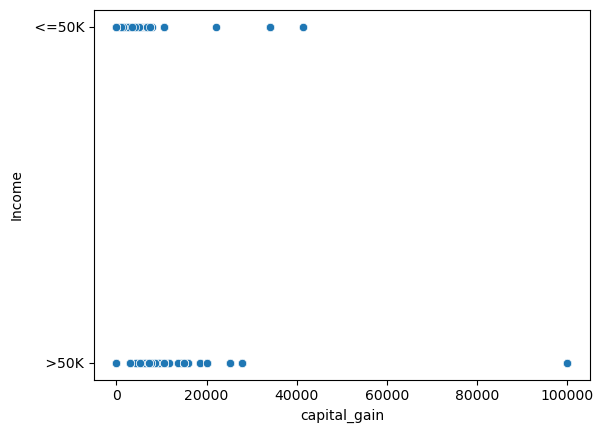

In [21]:
import seaborn as sns
sns.scatterplot(data = new_df, x = 'capital_gain', y = 'Income')

<Axes: xlabel='log_capital_gain', ylabel='Income'>

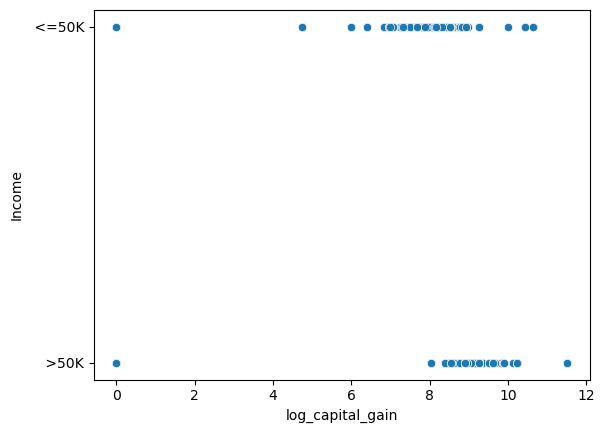

In [22]:
new_df['log_capital_gain'] = np.log1p(new_df['capital_gain'])
new_df['sqrt_capital_gain'] = np.sqrt(new_df['capital_gain'])
sns.scatterplot(data = new_df, x = 'log_capital_gain', y = 'Income')

## 4. Feature Selection

1. Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.
2. Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.

In [23]:

"""
for i in new_df.columns:
    if new_df[i].dtype == 'int64':
        scaler = StandardScaler()
        new_df[i] = scaler.fit_transform(new_df[i].values.reshape(-1,1))
"""

X = new_df.drop('Income', axis = 1)
Y = new_df['Income']
new_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,Income,log_capital_gain,sqrt_capital_gain
0,39,7,77516,9,13,4,1,1,2174,0,...,False,False,False,False,True,False,True,<=50K,7.684784,46.626173
1,50,6,83311,9,13,2,4,0,0,0,...,False,False,False,False,True,False,True,<=50K,0.000000,0.000000
2,38,4,215646,11,9,0,6,1,0,0,...,False,False,False,False,True,False,True,<=50K,0.000000,0.000000
3,53,4,234721,1,7,2,6,0,0,0,...,False,False,True,False,False,False,True,<=50K,0.000000,0.000000
4,28,4,338409,9,13,2,10,5,0,0,...,False,False,True,False,False,True,False,<=50K,0.000000,0.000000


In [24]:
# Creating model isolation forest unsupervised algorithm
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

model = IsolationForest()
model.fit(X)
predictions = model.predict(X)
predictions

array([ 1,  1,  1, ...,  1,  1, -1])

In [25]:
# printing Indexes that are our outliers

indexes = np.where(predictions<0)
indexes

(array([    4,     6,     8, ..., 32524, 32529, 32536], dtype=int64),)

In Isolation Forest, outliers or anomalies are identified as data points that have shorter average path lengths in the constructed trees. These data points are isolated quickly due to their uniqueness or rarity in the feature space.

1. Anomaly Detection: In applications where the goal is anomaly detection (e.g., fraud detection, network intrusion detection), the outliers identified by Isolation Forest are the main focus. These outliers represent potentially unusual or suspicious behavior that requires further investigation.Therefore, the impact of outliers is significant as they provide valuable insights into anomalous patterns in the data.

2. Model Performance: In some cases, outliers may impact the overall performance of the model. For example, if outliers are not indicative of anomalous behavior but rather noisy or erroneous data, they may introduce bias or decrease the accuracy of the model. In such cases, it may be necessary to preprocess the data to handle outliers appropriately, or to consider alternative modeling approaches.

3. Data Understanding: Outliers detected by Isolation Forest can also provide insights into the underlying structure of the data. They may reveal interesting patterns, relationships, or anomalies in the data distribution that were previously unknown. Analyzing outliers can lead to a better understanding of the data and inform subsequent modeling decisions.

4. Robustness: Isolation Forest is relatively robust to outliers compared to other outlier detection methods, such as k-means or density-based methods, which may be influenced more heavily by outliers. However, extreme outliers or anomalies that are present in the majority of the data may still impact the performance of Isolation Forest.

In summary, the impact of outliers detected by Isolation Forest depends on the specific context and goals of our analysis. While outliers can provide valuable insights and improve anomaly detection performance, they may also affect the overall performance of the model and require careful consideration during data preprocessing and analysis.

## PPS Predictive Power Score

# I have searched and learned about the PPS, it is having values between (0 , 1) which will give idea to us which feature is contributing more. In PPS there are 2 types of gains, one is by matrix (pps.matrix()) which shows the result through a matrix way, and the other is pps.score() which gives us directly the result.

In [31]:
# I have tried alot to install PPS library, but it is giving me error, and my antivirus protection keeps rejecting it as it wants my camra and microphone access permission.
# we can use instead SVM,ERF,DT-Feature classifier...
pip install pps-python

  Obtaining dependency information for pps-python from https://files.pythonhosted.org/packages/2f/97/bbf3a1a1a04da0fb3f0a6742f4569c9f20c8ed2a6dfcafa486db48646ece/pps_python-0.0.8-py3-none-any.whl.metadata
  Using cached pps_python-0.0.8-py3-none-any.whl.metadata (1.1 kB)
  Obtaining dependency information for pandas<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/da/6d/1235da14daddaa6e47f74ba0c255358f0ce7a6ee05da8bf8eb49161aa6b5/pandas-1.5.3-cp311-cp311-win_amd64.whl.metadata
  Using cached pandas-1.5.3-cp311-cp311-win_amd64.whl.metadata (12 kB)
  Using cached scikit-learn-0.24.2.tar.gz (7.5 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Error [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software while executing command pip subprocess to install build dependencies
ERROR: Could not install packages due to an OSError: [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software

